In [1]:
import glob
import numpy as np 
import matplotlib.pyplot as plt

from biopandas.pdb import PandasPdb
from sklearn.decomposition import PCA
from colav.extract_data import * 

In [2]:
# extract the feature information 
resnum_bounds = (7, 279)
theseus_strucs = sorted(glob.glob("../results/ptp1b_data/ptp1b_theseus_data/*pdb"))
pw_data_matrix, pw_strucs = generate_pw_matrix(structure_list=theseus_strucs, 
                                               resnum_bounds=resnum_bounds, 
                                               save=False, 
                                               verbose=True
                                              )

Generating the coordinate set...
Attempting to calculate for ../results/ptp1b_data/ptp1b_theseus_data/theseus_1a5y_chainA.pdb
Skipping ../results/ptp1b_data/ptp1b_theseus_data/theseus_1a5y_chainA.pdb; not all desired CA atoms present!
Attempting to calculate for ../results/ptp1b_data/ptp1b_theseus_data/theseus_1aax_chainA.pdb
Attempting to calculate for ../results/ptp1b_data/ptp1b_theseus_data/theseus_1bzc_chainA.pdb
Attempting to calculate for ../results/ptp1b_data/ptp1b_theseus_data/theseus_1bzh_chainA.pdb
Attempting to calculate for ../results/ptp1b_data/ptp1b_theseus_data/theseus_1bzj_chainA.pdb
Attempting to calculate for ../results/ptp1b_data/ptp1b_theseus_data/theseus_1c83_chainA.pdb
Attempting to calculate for ../results/ptp1b_data/ptp1b_theseus_data/theseus_1c84_chainA.pdb
Attempting to calculate for ../results/ptp1b_data/ptp1b_theseus_data/theseus_1c85_chainA.pdb
Attempting to calculate for ../results/ptp1b_data/ptp1b_theseus_data/theseus_1c86_chainA.pdb
Attempting to calcula

In [3]:
# perform PCA 
pca = PCA(n_components=10)
transform = pca.fit_transform(pw_data_matrix)
pca.explained_variance_ratio_

array([0.59867585, 0.0718247 , 0.06767347, 0.04182721, 0.03015834,
       0.0148717 , 0.01308885, 0.01175772, 0.00932679, 0.00816632])

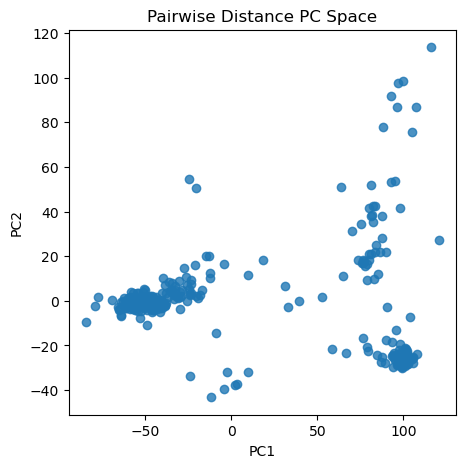

In [4]:
# plot the resulting PC space, with structures represted by markers
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(transform[:,0], transform[:,2], marker='o', alpha=0.8)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Pairwise Distance PC Space")

plt.show()

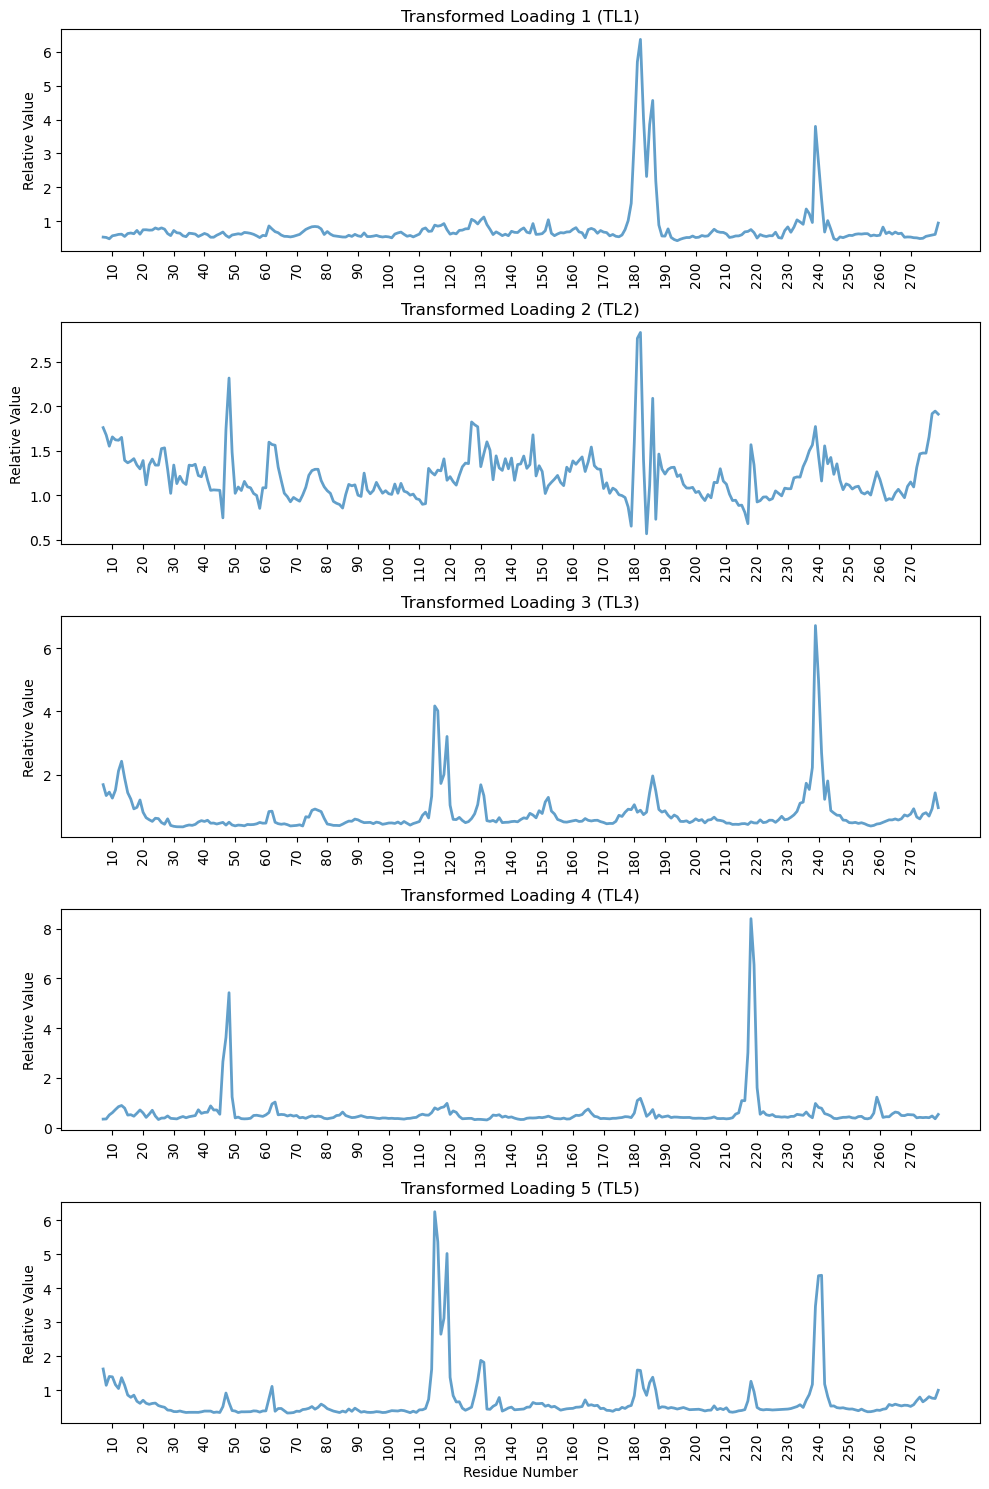

In [5]:
# plot the transformed loadings (accounting for sin and cos)
fig, ax = plt.subplots(5,1,figsize=(10,15)); ax = ax.flatten()

for i in np.arange(5): 

    ax[i].plot(np.arange(resnum_bounds[0], resnum_bounds[1]+1), calculate_pw_tl(pca.components_[i], resnum_bounds), '-', linewidth=2, alpha=0.7)

    ax[i].set_title(f'Transformed Loading {i+1} (TL{i+1})')
    ax[i].set_xticks([x for x in np.arange(resnum_bounds[0], resnum_bounds[1]+1) if x%10 == 0], 
                     labels=[x for x in np.arange(resnum_bounds[0], resnum_bounds[1]+1) if x%10 == 0], 
                     rotation='vertical')
    ax[i].set_ylabel('Relative Value')
ax[-1].set_xlabel("Residue Number")
plt.tight_layout()
plt.show()